# Absenteeism at work

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_excel('absentee.xls')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


Data Description

1. Individual identification (ID)

2. Reason for absence (ICD).

3. Month of absence

4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))

5. Seasons (summer (1), autumn (2), winter (3), spring (4))

6. Transportation expense

7. Distance from Residence to Work (kilometers)

8. Service time

9. Age

10. Work load Average/day

11. Hit target

12. Disciplinary failure (yes=1; no=0)

13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))

14. Son (number of children)

15. Social drinker (yes=1; no=0)

16. Social smoker (yes=1; no=0)

17. Pet (number of pet)

18. Weight

19. Height

20. Body mass index

21. Absenteeism time in hours (target)

In [3]:
#dataset shape defines number of columns and rows

data.shape

(740, 21)

In [4]:
#dataset columns

data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
#data types of the data

data.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [6]:
#finding null values in dataset

data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [7]:
#finging unique values in the columns

data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [8]:
#To get the descriptive analysis 

data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
#Finding the null values and data types of the datset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [10]:
#dropping null values from the dataset

data.dropna()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


# Data analysing and Visualization

Univariate plot

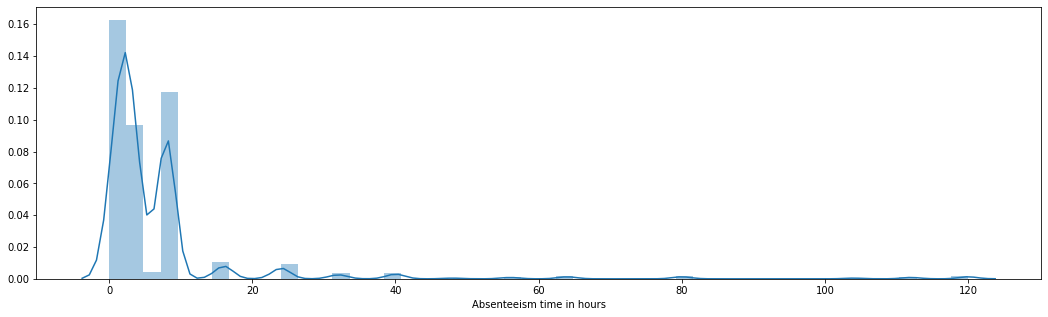

In [11]:
plt.figure(figsize=(18,5))
sb.distplot(data['Absenteeism time in hours'])

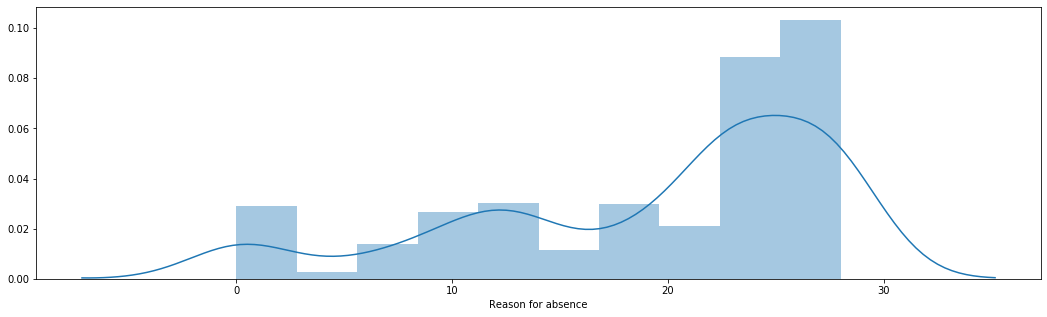

In [12]:
plt.figure(figsize=(18,5))
sb.distplot(data['Reason for absence'])

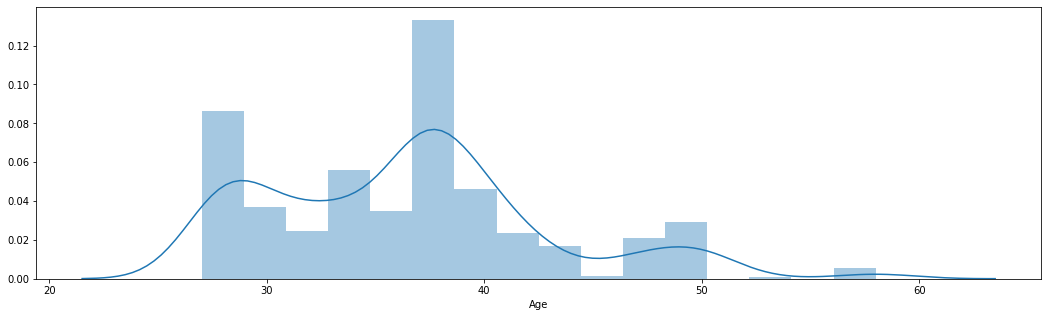

In [13]:
plt.figure(figsize=(18,5))
sb.distplot(data['Age'])

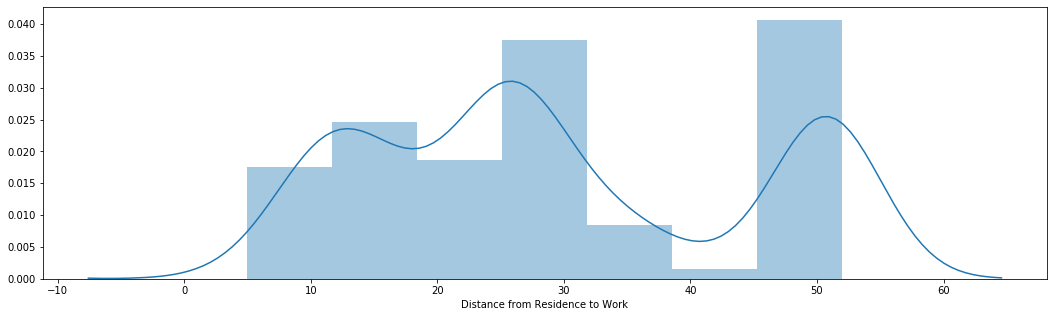

In [14]:
plt.figure(figsize=(18,5))
sb.distplot(data['Distance from Residence to Work'])

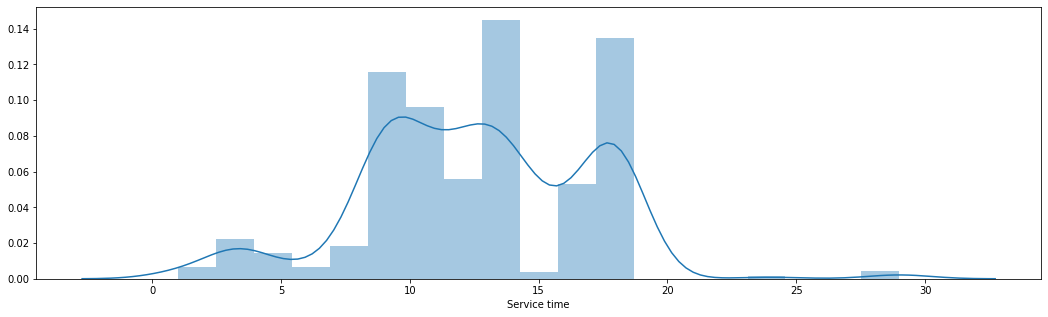

In [15]:
plt.figure(figsize=(18,5))
sb.distplot(data['Service time'])

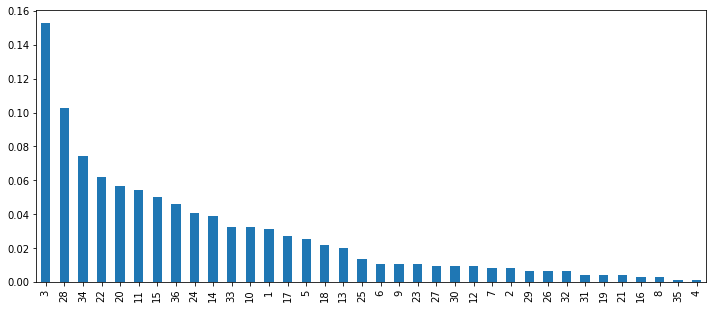

In [16]:
plt.figure(figsize=(12,5))
data['ID'].value_counts(normalize=True).plot.bar()

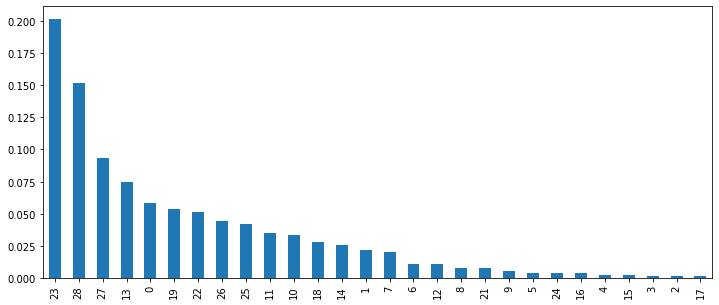

In [17]:
plt.figure(figsize=(12,5))
data['Reason for absence'].value_counts(normalize=True).plot.bar()

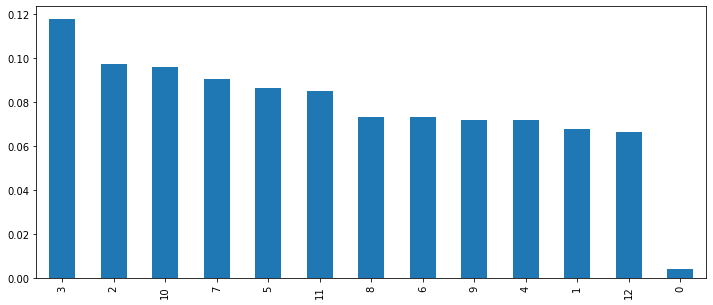

In [18]:
plt.figure(figsize=(12,5))
data['Month of absence'].value_counts(normalize=True).plot.bar()

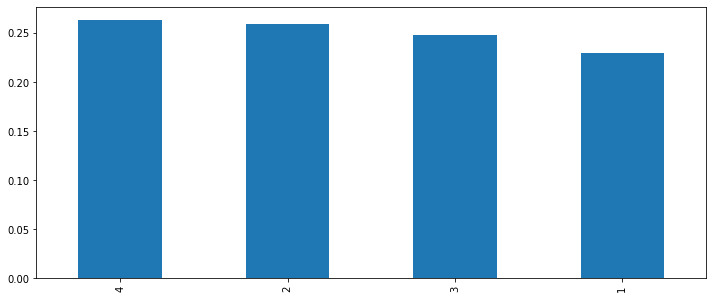

In [19]:
plt.figure(figsize=(12,5))
data['Seasons'].value_counts(normalize=True).plot.bar()

Bivaraite plot

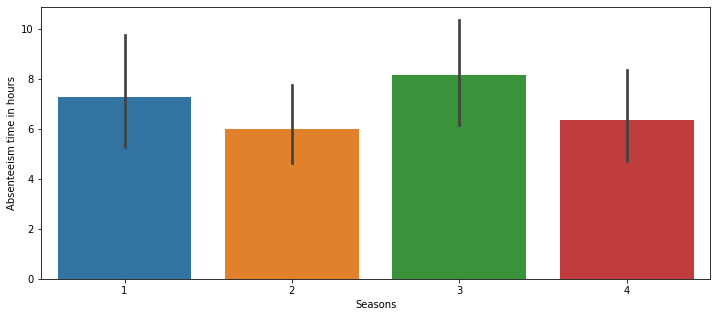

In [20]:
plt.figure(figsize=(12,5))
sb.barplot(x='Seasons',y='Absenteeism time in hours',data=data)

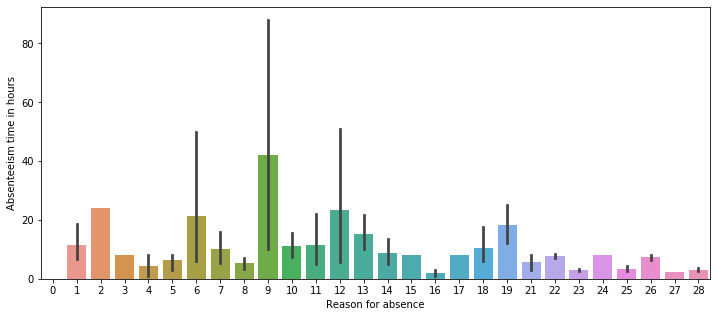

In [21]:
plt.figure(figsize=(12,5))
sb.barplot(x='Reason for absence',y='Absenteeism time in hours',data=data)

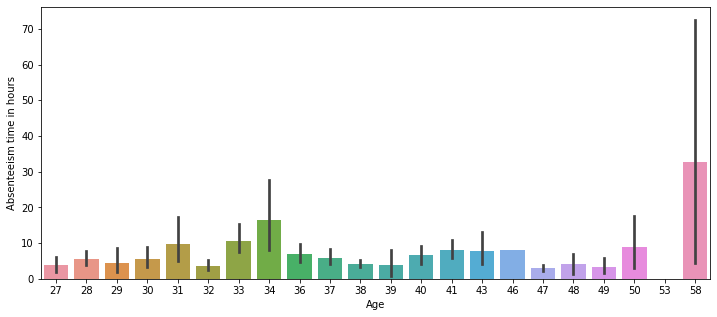

In [22]:
plt.figure(figsize=(12,5))
sb.barplot(x='Age',y='Absenteeism time in hours',data=data)

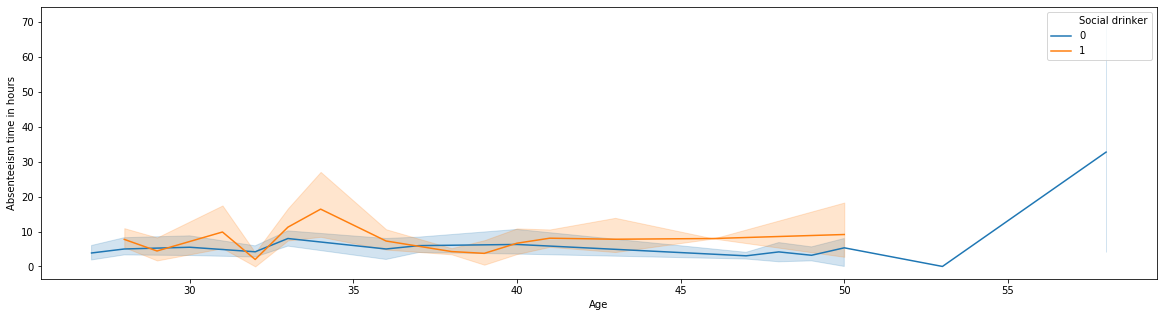

In [23]:
plt.figure(figsize=(20,5))
sb.lineplot(x='Age',y='Absenteeism time in hours',data=data,hue='Social drinker')

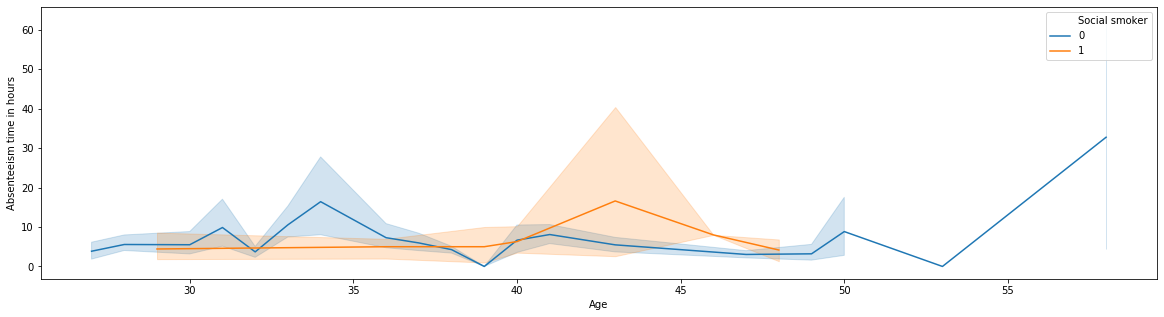

In [24]:
plt.figure(figsize=(20,5))
sb.lineplot(x='Age',y='Absenteeism time in hours',data=data,hue='Social smoker')

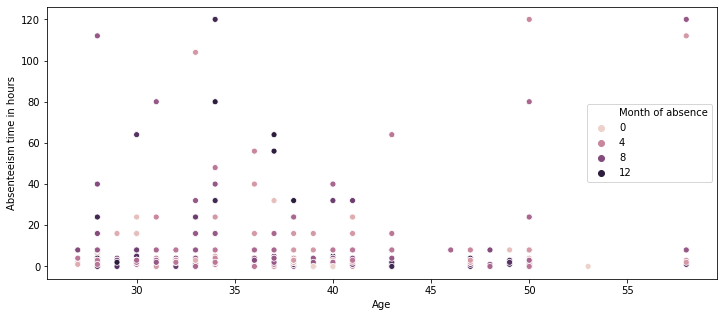

In [25]:
plt.figure(figsize=(12,5))
sb.scatterplot(x='Age',y='Absenteeism time in hours',data=data,hue='Month of absence')

In [26]:
#dropping columns which are not usefull in modeling

data1=data.drop(['ID', 'Transportation expense',  'Hit target',
       'Disciplinary failure', 'Education', 'Son','Pet', 'Weight', 'Height'],axis=1)

In [27]:
data1

,Reason for absence,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Service time,Age,Work load Average/day,Social drinker,Social smoker,Body mass index,Absenteeism time in hours
0,26,7,3,1,36,13,33,239554,1,0,30,4
1,0,7,3,1,13,18,50,239554,1,0,31,0
2,23,7,4,1,51,18,38,239554,1,0,31,2
3,7,7,5,1,5,14,39,239554,1,1,24,4
4,23,7,5,1,36,13,33,239554,1,0,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,36,13,33,264604,1,0,30,8
736,11,7,3,1,11,14,37,264604,0,0,29,4
737,0,0,3,1,14,13,40,271219,1,0,34,0
738,0,0,4,2,35,14,39,271219,1,0,35,0


In [28]:
# the Correlation between the different variables

data1.corr()

,Reason for absence,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Service time,Age,Work load Average/day,Social drinker,Social smoker,Body mass index,Absenteeism time in hours
Reason for absence,1.000000,-0.083858,0.116319,-0.117925,0.161831,0.048425,-0.078608,-0.123472,0.065441,-0.115702,0.037205,-0.173116
Month of absence,-0.083858,1.000000,-0.006528,0.407770,-0.003887,-0.062862,-0.001520,-0.169989,0.056226,-0.038603,0.051046,0.024345
Day of the week,0.116319,-0.006528,1.000000,0.046493,0.118026,0.021252,0.004459,0.015646,0.041772,0.013156,-0.103578,-0.124361
Seasons,-0.117925,0.407770,0.046493,1.000000,-0.063108,-0.010904,-0.012089,0.150439,-0.045982,-0.048671,-0.011031,-0.005615
Distance from Residence to Work,0.161831,-0.003887,0.118026,-0.063108,1.000000,0.131730,-0.145886,-0.068677,0.452196,-0.075369,0.113772,-0.088363
Service time,0.048425,-0.062862,0.021252,-0.010904,0.131730,1.000000,0.670979,-0.000668,0.353141,0.072424,0.499718,0.019029
Age,-0.078608,-0.001520,0.004459,-0.012089,-0.145886,0.670979,1.000000,-0.039425,0.213183,0.121738,0.470688,0.065760
Work load Average/day,-0.123472,-0.169989,0.015646,0.150439,-0.068677,-0.000668,-0.039425,1.000000,-0.033713,0.030968,-0.090709,0.024749
Social drinker,0.065441,0.056226,0.041772,-0.045982,0.452196,0.353141,0.213183,-0.033713,1.000000,-0.111678,0.323978,0.065067
Social smoker,-0.115702,-0.038603,0.013156,-0.048671,-0.075369,0.072424,0.121738,0.030968,-0.111678,1.000000,-0.196006,-0.008936


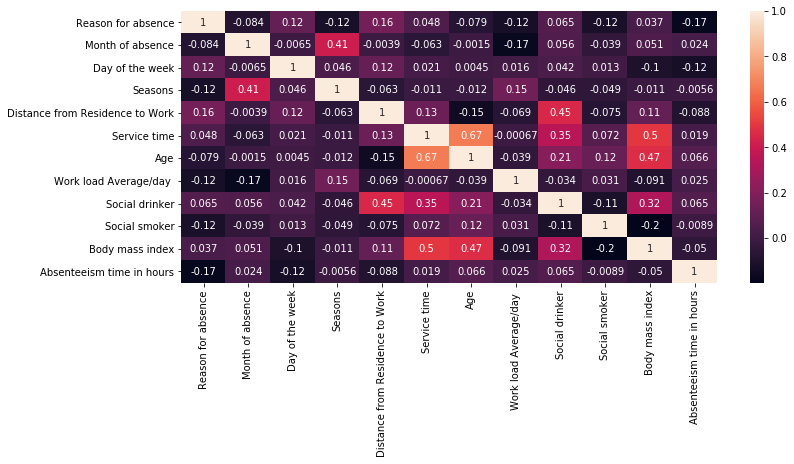

In [29]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,5))
sb.heatmap(data1.corr(),annot=True)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [30]:
datafin = pd.get_dummies(data = data1)
datafin

,Reason for absence,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Service time,Age,Work load Average/day,Social drinker,Social smoker,Body mass index,Absenteeism time in hours
0,26,7,3,1,36,13,33,239554,1,0,30,4
1,0,7,3,1,13,18,50,239554,1,0,31,0
2,23,7,4,1,51,18,38,239554,1,0,31,2
3,7,7,5,1,5,14,39,239554,1,1,24,4
4,23,7,5,1,36,13,33,239554,1,0,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,36,13,33,264604,1,0,30,8
736,11,7,3,1,11,14,37,264604,0,0,29,4
737,0,0,3,1,14,13,40,271219,1,0,34,0
738,0,0,4,2,35,14,39,271219,1,0,35,0


In [31]:
x=datafin.drop(['Absenteeism time in hours'],axis=1)
y=datafin['Absenteeism time in hours']

In [32]:
#Getting the shape of the x and variables

print(x.shape)
print(y.shape)

(740, 11)
(740,)


In [33]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=50)

Finding metric data , cross validation and prediction

Using for loop to find n number of model buidling at once

In this we are also finding mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [35]:
model=[LogisticRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVC(),GradientBoostingRegressor()]

In [36]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square')
    print()
    print('MAE :',metrics.mean_absolute_error(y_test,pred))
    print('MSE :',metrics.mean_squared_error(y_test,pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print()


Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 4.578378378378378
MSE : 175.3027027027027
RMSE : 13.240192698850825
r2 score : 0.051421697094186536

Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 5.127511018711019
MSE : 161.30399464799783
RMSE : 12.700550958442623
r2 score : 0.1271699344269882

Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 4.954054054054054
MSE : 200.82567567567568
RMSE : 14.171297600279082
r2 score : -0.08668534868748923

Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 4.6
MSE : 176.65405405405406
RMSE : 13.2911268918047
r2 score : 0.044109416383556255

Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 5.821186830913386
MSE : 178.2443413499079
RMSE : 13.350818003025429
r2 score : 0.03550423231636013



In [37]:
pca=PCA(n_components=11)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=50)

In [39]:
model=[LogisticRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVC(),GradientBoostingRegressor()]

# Finding metric data , cross validation and prediction

Using for loop to find n number of model buidling at once

In this we are also finding  mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [40]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square')
    print()
    print('MAE :',metrics.mean_absolute_error(y_test,pred))
    print('MSE :',metrics.mean_squared_error(y_test,pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print('-'*100)
    print('cross validation and cross prediction')
    #cross valiadtion
    print()
    score=cross_val_score(m,x,y,cv=5)
    print('mean score :',score.mean())
    print('STD score:',score.std())
    print()
    #cross prediction
    predscore=cross_val_predict(m,x,y,cv=5)
    print("cross prediction",predscore)
    print()
    print('*'*100)

Finding mean_absolute_error,mean_squared_error, root_mean_square

MAE : 4.578378378378378
MSE : 175.3027027027027
RMSE : 13.240192698850825
r2 score : 0.051421697094186536
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.3918918918918919
STD score: 0.04008755938970628

cross prediction [ 8  0  8  8  8  3  8  4  8  2  0  0  8  8  8  8  3  8  8  3  8  8  8  4
  8  8  8  8  8  3  8  8  2  8  8  8  8  8  8  3  2  2  8  8  8  2  8  4
  4  8  0  8  2  2  0  0  3  3  0  3  3  3  3  2  0  2  3  3  2  2  3  8
  3  2  8  8  2  8  8  3  1  1  8  1  1  8  1  8  1  8  1  1  8  1  1  1
  8  1  1  8  1  1  3  4  1  8  2  4  2  8  1  1  1  2  8  2  8  2  2  2
  2  2  2  2  2  2  2  2  2  2  8  2  2  2  2  2  8  2  0  8  2  2  2  8
  8  0  2  2  2  2  2  8  2  2  2  2  8  8  8  8  8  2  8  8  8  0  2 24
  8  8  2  2  8  8  2  8 16  8  8  8  8  2  8  2  2  2  2  8  8  2  2  8
  1  2 24  2  2  8  8 2

mean score : 0.3945945945945946
STD score: 0.03812631345855643

cross prediction [ 8  8  4  8  8  3  8  4  8  8  0  0  8  8  4  8  3  4  8  2  8  8  8  4
  8  8  8  2  8  4  8  8  8  8  4  8  8  8  8  4  2  8  4  8  8  8  4  2
  4  8  0  8  2  2  0  0  3  1  0  2  1  8  1  2  0  2  1  3  2  3  2  8
  1  3  4  8  2  8  8  4  1  3  8  8  8  8  2  8  3  8  3  8  3  8  2  2
  8  8  2  8  1  2  3  4  2  8  2  4  3  8  2  8  2  2  8  2  8  2  2  2
  2  2  2  2  2  2  2  2  2  2  8  2  2  2  2  2  8  2  0  8  2  2  3  8
  8  8  2  2  2  2  2  2  2  2  2  8  8  8  2  8  8  2  8  8  8  8  8  8
  8  2  3  2  8  8  2  8  8  8  8  8  8  2  8  2  2  2  8  8  8  2  3  8
  1  8  8  2  2  8  8  8  8  8  8  0  8  8  8  8  3  8  8  8  8  8  8  8
  8  8  8  8 24  8  8  8  8  8  8 24 24  8 24  8  8  8  8  2  8  0  8  2
  2  2  2  8  8  8  8  8  2  8  8  8  8  8  8  8  8  8  4  8  2  8  8  1
  4  8  1  8  8  8  8  1  8  0  8  2  8  8  8  8  4  2  4  8  1  0  8  8
  8  8  2  8  8  0  0  0  8  8  3  8  0  8 

# GridSearchCV

In [41]:
param_grid = {'learning_rate': [0.1, 1], 
              'max_depth': [5,10]
}

gbr = GradientBoostingRegressor() 
gridscv = GridSearchCV( estimator=gbr, param_grid=param_grid, cv=5, n_jobs = -1)
gridscv.fit(x_train,y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [42]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }
rfr=RandomForestRegressor()
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Saving the model with joblib

In [43]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'absent.pkl')

['absent.pkl']

# Conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib